# Benchmark CAD strategy
## Comparison of clustering results in term of association with PCs
- For CAD cases, clustering is performed for each tissue separately
- 3 settings: 
    - **corrPCs_zscaled**: scale gene-wise, correct for PCs (1-10) for each gene separately, rescaled by Z-stat
    - **corrPCs_original**: scale gene-wise, correct for PCs (1-10) for each gene separately
    - **zscaled**: scale gene-wise, rescaled by Z-stat
- additionally cluster performed using as input the first 40 PCs, each scale across all CAD cases

In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(ggrepel)
library(igraph)
library(gridExtra)
library(ggpubr)
library(ComplexHeatmap)


options(bitmapType = 'cairo', device = 'png')

setwd('/psycl/g/mpsziller/lucia/CAD_UKBB/eQTL_PROJECT')
fold_notebook <- '/psycl/g/mpsziller/lucia/castom_cad_scz/jupyter_notebook/'
tissues <- read.table('OUTPUT_GTEx/Tissue_CADgwas', h=F, stringsAsFactors = F)$V1
tissues <- tissues[!tissues %in% c('Artery_Tibial', 'Small_Intestine_Terminal_Ileum', 'Stomach', 'Thyroid')]
color_tissues <- read.table(sprintf('%scolor_tissues.txt', fold_notebook), h=T, stringsAsFactors = F)

color_tissues <- color_tissues[match(tissues, color_tissues$tissue), ]
# outFold <- 'OUTPUT_GTEx/predict_CAD/AllTissues/200kb/CAD_GWAS_bin5e-2/UKBB/CAD_HARD_clustering/compare_PCs_zcorrPCs_z/'
outFold <- sprintf('%sCAD_clustering/', fold_notebook)
out_PC <- get(load('INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/PCs_clusterCases_PGmethod_HKmetric.RData'))

sample_info <- read.table('INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/covariateMatrix_CADHARD_All.txt', h=T, stringsAsFactors = F)
sample_info <- sample_info[match(out_PC$samples_id, sample_info$Individual_ID),]

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.5
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required pa

In [2]:
# compare clustering structure
df_NMI <- data.frame(tissue = tissues, z_vs_zcorrPCs = NA)
df_cl <-  data.frame(tissue = tissues, z = NA, zcorrPCs = NA)
test_cv <- cl_cPC <- cl <- list()

for(i in 1:length(tissues)){
  
  tissue <- tissues[i]
  print(tissue)
  
  file <- sprintf('OUTPUT_GTEx/predict_CAD/%s/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/CAD_HARD_clustering//update_corrPCs/', tissue)
  out <- get(load(sprintf('%s/tscore_zscaled_clusterCases_PGmethod_HKmetric.RData', file)))
  cl[[i]] <- out$cl_best
  cov_test <- out$test_cov %>% mutate(type = 'zscaled')
   
  out_cPC <- get(load(sprintf('%s/tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric.RData', file)))
  cl_cPC[[i]] <- out_cPC$cl_best
  cov_test_cPC <- out_cPC$test_cov %>% mutate(type = 'corrPCs_zscaled')
  
  df_NMI$z_vs_zcorrPCs[i] <- compare(cl[[i]]$gr, cl_cPC[[i]]$gr, method = 'NMI')
    
  df_cl$z[i] <- length(unique(cl[[i]]$gr))
  df_cl$zcorrPCs[i] <- length(unique(cl_cPC[[i]]$gr))
  
  test_cv[[i]] <- bind_rows(cov_test, cov_test_cPC) %>% mutate(tissue = tissue)
  
}

test_cv <- bind_rows(test_cv)


[1] "Adipose_Subcutaneous"
[1] "Adipose_Visceral_Omentum"
[1] "Adrenal_Gland"
[1] "Artery_Aorta"
[1] "Artery_Coronary"
[1] "Colon_Sigmoid"
[1] "Colon_Transverse"
[1] "Heart_Atrial_Appendage"
[1] "Heart_Left_Ventricle"
[1] "Liver"
[1] "Whole_Blood"



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




cov_id,pval,statistic,test_type,pval_BHcorr,kNN,type,tissue,logpval
<fct>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<fct>,<dbl>
PC1,0.280217008,5.069733,kruskal,0.49458392,20,corrPCs_zscaled,Liver,0.55250551
PC2,0.241997559,5.474303,kruskal,0.49458392,20,corrPCs_zscaled,Liver,0.61618901
PC3,0.685072836,2.276379,kruskal,0.73400661,20,corrPCs_zscaled,Liver,0.16426325
PC4,0.007523962,13.929358,kruskal,0.05642971,20,corrPCs_zscaled,Liver,2.12355342
PC5,0.005513329,14.638293,kruskal,0.05642971,20,corrPCs_zscaled,Liver,2.25858608
PC6,0.796091514,1.670376,kruskal,0.79609151,20,corrPCs_zscaled,Liver,0.09903701
PC7,0.329722615,4.609828,kruskal,0.49458392,20,corrPCs_zscaled,Liver,0.48185126
PC8,0.520573917,3.227044,kruskal,0.65071740,20,corrPCs_zscaled,Liver,0.28351760
PC9,0.075876591,8.467562,kruskal,0.37938295,20,corrPCs_zscaled,Liver,1.11989219


Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 8 unlabeled data po

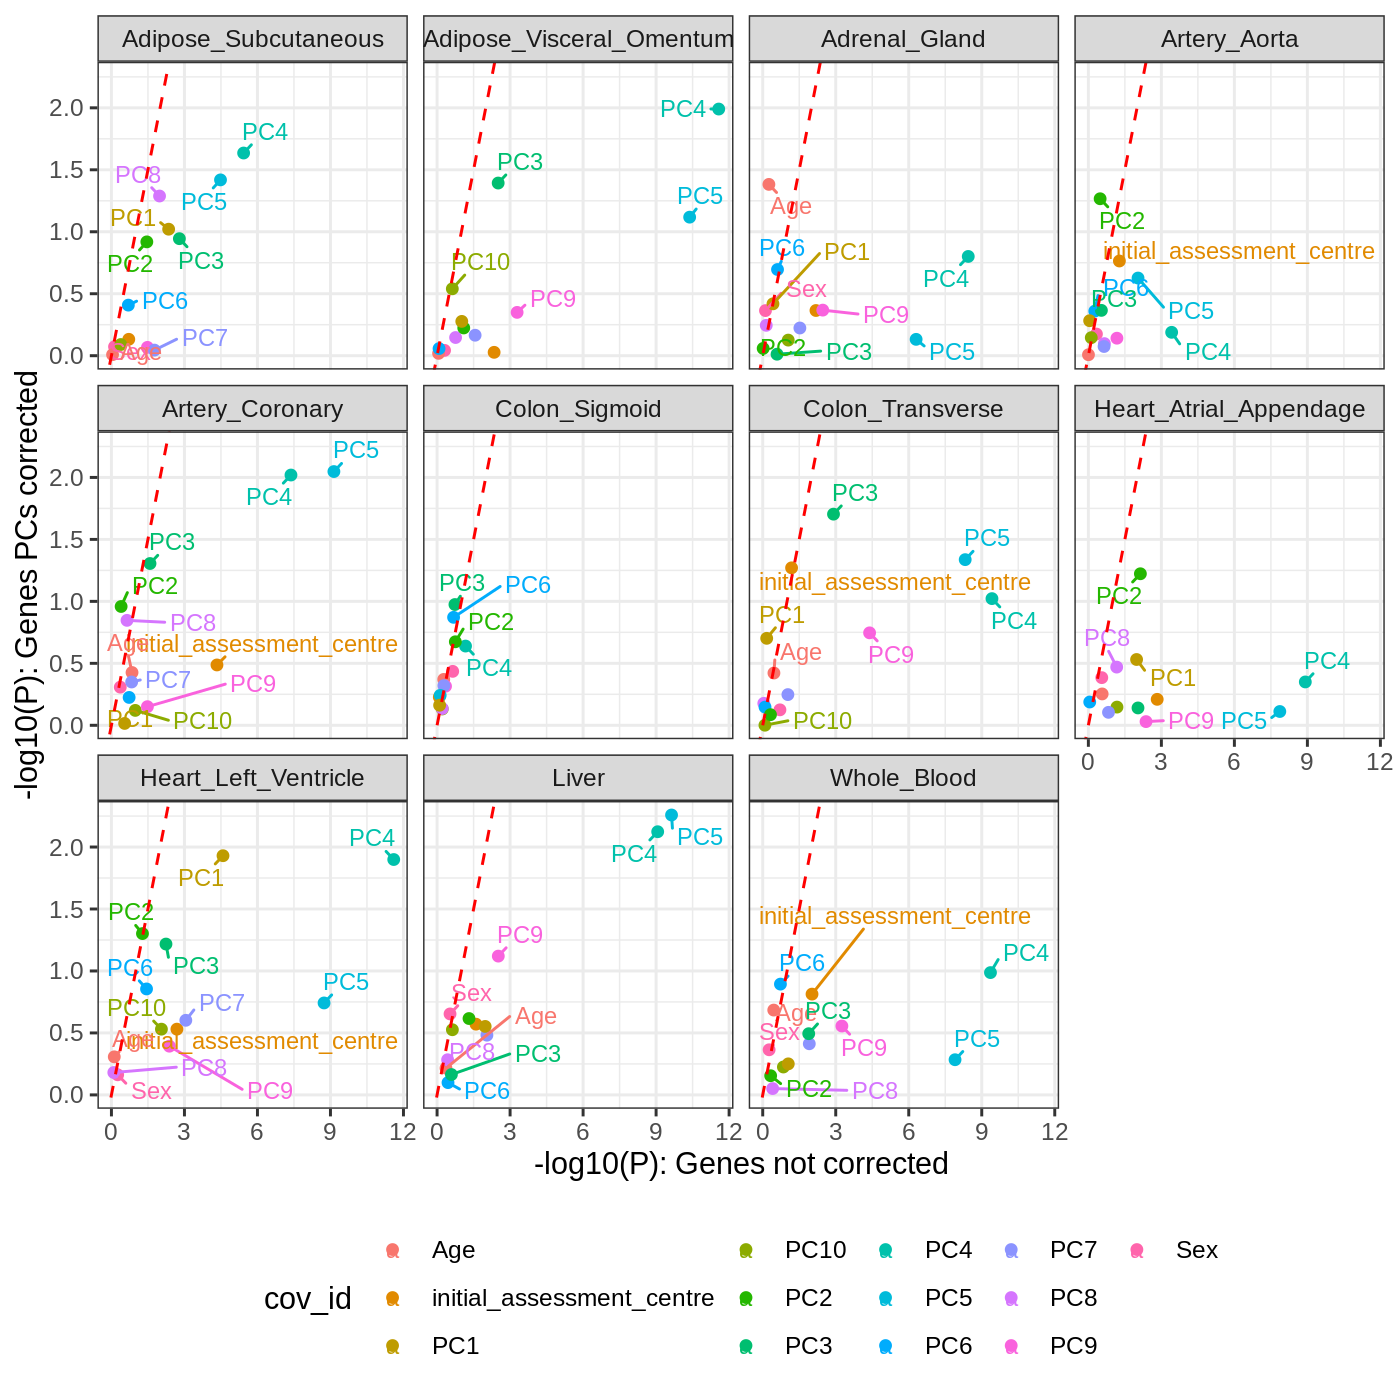

In [3]:
### plot test cov ###
library(reshape2)
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 200)
test_cv  <- test_cv %>% filter(!cov_id %in% c('Batch', 'Array'))
df_cov_pl <-  test_cv %>% filter(!tissue %in% c('none')) %>% mutate(logpval = -log10(pval))

df_cov_pl$tissue <-  factor(df_cov_pl$tissue, levels = tissues)
df_cov_pl$cov_id <- factor(df_cov_pl$cov_id, 
                           levels = rev(c(paste0('PC', 1:10), 'Age', 'Gender', 'initial_assessment_centre')))

df_cov_pl %>% filter(tissue == 'Liver', type == 'corrPCs_zscaled')

df_cov_pl_paper <- dcast(df_cov_pl, 
            tissue + cov_id ~ type, 
            value.var = "logpval") %>%
    dplyr::mutate(cov_id = dplyr::case_when(cov_id == "Gender" ~ "Sex", 
                              TRUE ~ as.character(cov_id)))

pl_cov <- ggplot(df_cov_pl_paper,
                   aes(x = zscaled, y = corrPCs_zscaled, 
                      label = cov_id, color = cov_id))+
  geom_point()+
  facet_wrap(.~tissue, ncol = 4)+
  geom_text_repel(size = 3, min.segment.length = 0, force = 7) + 
  geom_abline(slope = 1, intercept = 0, linetype = 'dashed', color = 'red')+
  xlab('-log10(P): Genes not corrected') + 
  ylab('-log10(P): Genes PCs corrected') + 
  theme_bw() + 
  theme(legend.position = 'bottom')
pl_cov

ggsave(pl_cov, filename = sprintf('%scompare_zscaled_zscaledcorrPCs_covariates_version_paper.pdf', outFold),
       width = 7, height = 7, dpi=200)



- Wilcoxon or chisquared test
- in general, reduced association to PC4-5 which are always significant when there is no correction
- in Liver with correction PC5 significant at 0.005. Not significant after BH correction!

tissue,X1,NMI,type
<fct>,<dbl>,<dbl>,<chr>
Adipose_Subcutaneous,1,0.8726965,zscaled vs corrPCs_zscaled
Adipose_Visceral_Omentum,1,0.7679684,zscaled vs corrPCs_zscaled
Adrenal_Gland,1,0.6712612,zscaled vs corrPCs_zscaled
Artery_Aorta,1,0.6572718,zscaled vs corrPCs_zscaled
Artery_Coronary,1,0.6450323,zscaled vs corrPCs_zscaled
Colon_Sigmoid,1,0.8432792,zscaled vs corrPCs_zscaled
Colon_Transverse,1,0.4872868,zscaled vs corrPCs_zscaled
Heart_Atrial_Appendage,1,0.7527175,zscaled vs corrPCs_zscaled
Heart_Left_Ventricle,1,0.7779591,zscaled vs corrPCs_zscaled


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


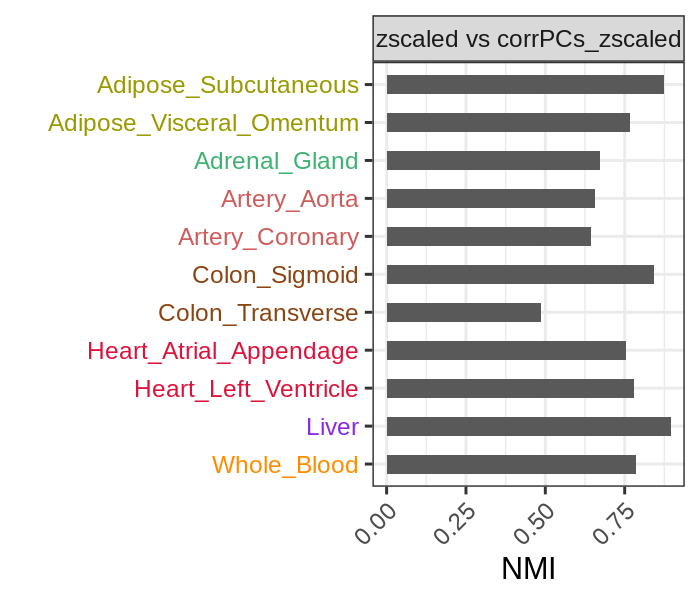

In [5]:
# NMI between corrPCs_zscaled and zscaled
options(repr.plot.width = 3.5, repr.plot.height = 3, repr.plot.res = 200)

n_tissues <- length(tissues)
df_nmi_pl <- data.frame(tissue = df_NMI$tissue, 1, 
                       NMI = c(df_NMI$z_vs_zcorrPCs), 
                       type = rep('zscaled vs corrPCs_zscaled', n_tissues))

df_nmi_pl$tissue <- factor(df_nmi_pl$tissue, levels = rev(tissues))
df_nmi_pl
pl_NMI <- ggplot(df_nmi_pl, aes(x = tissue, y = NMI))+
  geom_bar(stat = 'identity', width = 0.5)+
  facet_wrap(.~type, ncol = 3, scales = 'free_x')+
  xlab('') + ylab('NMI') + 
  theme_bw() + 
  theme(axis.text.y = element_text(colour = rev(color_tissues$color)), 
        axis.text.x = element_text(angle = 45, hjust = 1))+
  coord_flip()
pl_NMI
ggsave(pl_NMI, filename = sprintf('%scompare_zscaled_zscaledcorrPCs_NMI.pdf', outFold),
       width = 3.5, height = 3, dpi=200)



Nevertheless cluster structure is very similar, with NMI > 0.47 across all the tissues
### Is the structure of zscaled_corrPCs similar to clustering only based on PCs?

In [6]:
# function NMI plot
NMI_chisq_PCs <- function(tissues_name, clust_res, cl_PC, outFold, color_tissues){
    
    color_tissues <- color_tissues[match(tissues_name, color_tissues$tissues),]
    df_PCs_corrPCs <- data.frame(tissue = tissues_name, 
                              chisq_pvalue = sapply(clust_res, function(x) chisq.test(cl_PC$gr, x$gr)$p.value), 
                              NMI = sapply(clust_res, function(x) compare(cl_PC$gr, x$gr, method = 'nmi')))
                                       
    df_PCs_corrPCs$chisq_log_pvalue <- -log10(df_PCs_corrPCs$chisq_pvalue)                                 
    df_PCs_corrPCs$tissue <- factor(df_PCs_corrPCs$tissue, levels = rev(tissues_name))

    pl_chisq <- ggplot(df_PCs_corrPCs, aes(x = tissue, y = chisq_log_pvalue))+
      geom_bar(stat = 'identity', width = 0.5)+
      xlab('') + ylab('-log10(p-value)') + ggtitle('Chi-squared test:\nPCs vs corrPCs zscaled')+
      theme_bw() + 
      geom_hline(yintercept = -log10(0.05), linetype = 'dashed', color = 'red')+ 
      theme(title = element_text(size = 9), axis.text.y = element_text(colour = rev(color_tissues$color)), 
        axis.text.x = element_text(angle = 45, hjust = 1),)+
      coord_flip()

    pl_nmi <- ggplot(df_PCs_corrPCs, aes(x = tissue, y = NMI))+
      geom_bar(stat = 'identity', width = 0.5)+
      xlab('') + ylab('NMI') + ggtitle('NMI:\nPCs vs corrPCs zscaled')+
      theme_bw() + 
      theme(title = element_text(size = 9), axis.text.y = element_text(colour = rev(color_tissues$color)), 
        axis.text.x = element_text(angle = 45, hjust = 1),)+
      coord_flip()
    pl_tot <-  ggarrange(plotlist = list(pl_chisq, pl_nmi), ncol = 2, nrow = 1, align='h')
    print(pl_tot)
    ggsave(pl_tot, filename = sprintf('%scompare_zscaledcorrPCs_PCs_chisq_NMI.pdf', outFold),
       width = 8, height = 3, dpi=200)
                                           
    return(df_PCs_corrPCs)
}


compareNMI_random_cl <- function(id_t, n_rep, clust_res, cl_PC, NMI_original, outFold){

    nmi_random <- c()
    for(i in 1:n_rep){
        set.seed(i)
        rep_cl <- sample(clust_res[[id_t]]$gr)
        nmi_random <- c(nmi_random, compare(comm1 = rep_cl, cl_PC$gr, method = 'nmi'))
    }
    print('percentage of repetition s.t. actual NMI > random cl NMI')
    print(sum(NMI_original > nmi_random)/n_rep * 100)


    pdf(sprintf('%srandomCL_DLPC_compare_CLPCs_NMI.pdf', outFold), width = 4, height = 4)
    hist(nmi_random, xlim = c(0, max(c(NMI_original, nmi_random))))
    abline(v = NMI_original, col="red", lwd=3, lty=2)
    dev.off()

    hist(nmi_random, xlim = c(0, max(c(NMI_original, nmi_random))))
    abline(v = NMI_original, col="red", lwd=3, lty=2)

}          

Warning message in chisq.test(cl_PC$gr, x$gr):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(cl_PC$gr, x$gr):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(cl_PC$gr, x$gr):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(cl_PC$gr, x$gr):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(cl_PC$gr, x$gr):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(cl_PC$gr, x$gr):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(cl_PC$gr, x$gr):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(cl_PC$gr, x$gr):
“Chi-squared approximation may be incorrect”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpecte

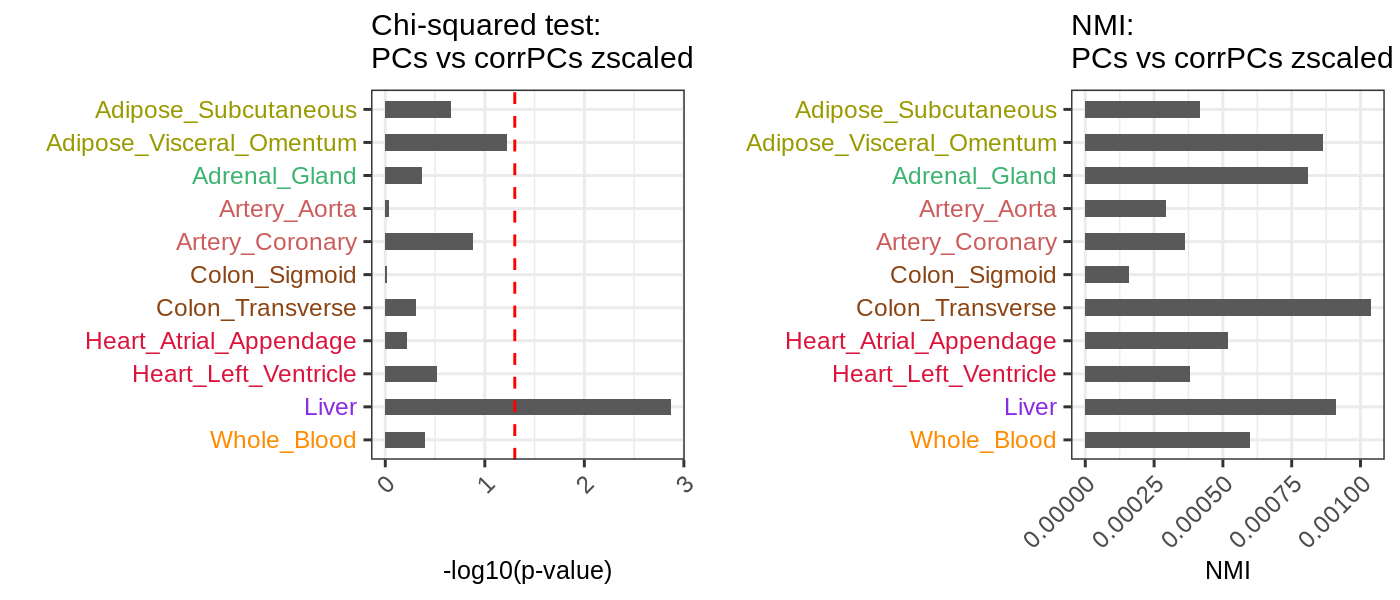

In [7]:
options(repr.plot.width = 7, repr.plot.height = 3, repr.plot.res = 200)

out_PC <- get(load('INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/PCs_clusterCases_PGmethod_HKmetric.RData'))
cl_PC <- out_PC$cl_best

df_PCs_corrPCs <- NMI_chisq_PCs(tissues_name = tissues,
                  clust_res = cl_cPC, 
                  cl_PC = cl_PC, 
                  outFold = outFold, 
                  color_tissues = color_tissues)
 

In [8]:
table(cl_PC$gr)
sort(df_PCs_corrPCs$NMI)


   1    2    3    4    5    6    7 
6705 1997 3977 5161 1093   56   34 

[1] 0.0001585582 0.0002930859 0.0003607380 0.0003809389 0.0004166016
 [6] 0.0005170175 0.0005968465 0.0008088093 0.0008650596 0.0009099010
[11] 0.0010364197

P-value < 0.05 only for Liver
### Simulation group same size as Liver
To understand if NMI represent a no overlap situation, randomly simulate 10000 times group configuration (same sizes as Liver) and compute NMI with PCs, how many times real clustering has a NMI > than the random configuration?

[1] "percentage of repetition s.t. actual NMI > random cl NMI"
[1] 99.88


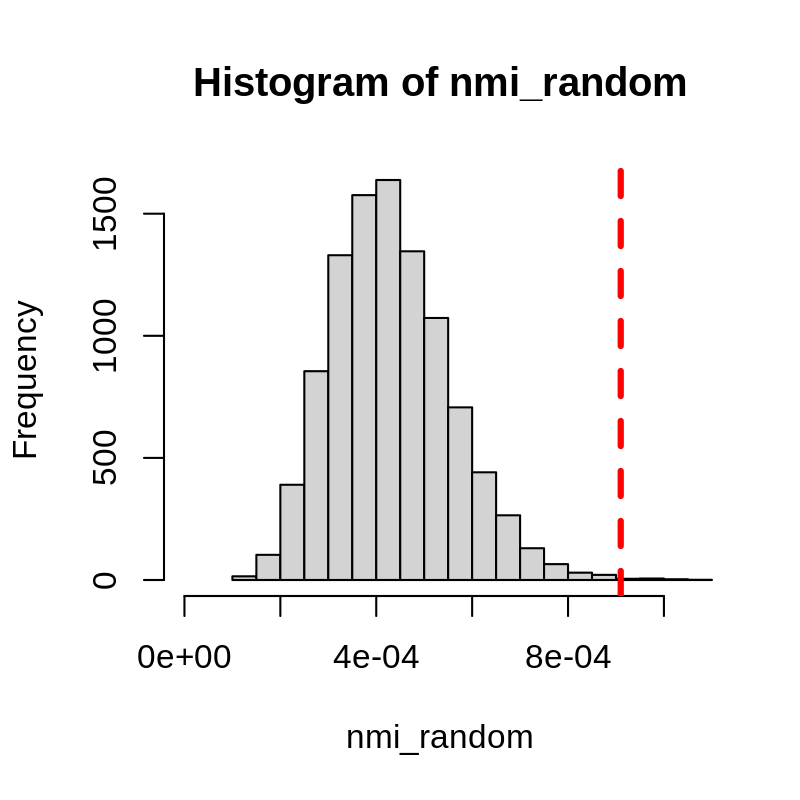

In [9]:
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 200)

id_liver <- which(tissues == 'Liver')

compareNMI_random_cl(id_t = id_liver, n_rep = 10000, 
                     clust_res = cl_cPC, cl_PC = cl_PC, 
                     NMI_original =  df_PCs_corrPCs$NMI[id_liver], 
                     outFold = outFold)

    

There seems a structure in the clustering from PCs retained in the Liver clustering, how much is the overlap?
Comparison via Fisher test for each pair of groups (n. gr Liver x n. gr PCs)

In [10]:
OR_mat <- matrix(nrow = length(unique(cl_cPC[[id_liver]]$gr)), ncol = length(unique(cl_PC$gr)), NA)
pval_mat <- matrix(nrow = length(unique(cl_cPC[[id_liver]]$gr)), ncol = length(unique(cl_PC$gr)), NA)
colnames(pval_mat) <- colnames(OR_mat) <- paste0('cl_PCs:gr', 1:length(unique(cl_PC$gr)))
rownames(pval_mat) <- rownames(OR_mat) <- paste0('cl_corrPCs_zscaled:gr', 1:length(unique(cl_cPC[[id_liver]]$gr)))

for(i in 1:length(unique(cl_cPC[[id_liver]]$gr))){
    for(j in 1:length(unique(cl_PC$gr))){
        tmp1 <- as.numeric(cl_cPC[[id_liver]]$gr == i)
        tmp2 <- as.numeric(cl_PC$gr == j)
        OR_mat[i,j] <- fisher.test(table(tmp1, tmp2))$estimate
        pval_mat[i,j] <- fisher.test(table(tmp1, tmp2))$p.value
    }
}
OR_mat
pval_mat

,cl_PCs:gr1,cl_PCs:gr2,cl_PCs:gr3,cl_PCs:gr4,cl_PCs:gr5,cl_PCs:gr6,cl_PCs:gr7
cl_corrPCs_zscaled:gr1,0.9138741,0.9849564,1.0854383,1.0230411,1.0462649,1.0023085,1.8831948
cl_corrPCs_zscaled:gr2,1.1305733,1.0145979,0.8408501,0.9836555,1.0427136,0.5693356,1.4248314
cl_corrPCs_zscaled:gr3,1.0021163,1.0482458,0.9387560,1.0489491,0.9121632,1.5622086,0.5530452
cl_corrPCs_zscaled:gr4,0.9985316,0.9348674,1.0683213,0.9893427,0.9802482,1.0697630,0.3100595
cl_corrPCs_zscaled:gr5,0.9079820,1.1694377,1.2564810,0.8537584,0.9256956,1.3180253,0.7046015


,cl_PCs:gr1,cl_PCs:gr2,cl_PCs:gr3,cl_PCs:gr4,cl_PCs:gr5,cl_PCs:gr6,cl_PCs:gr7
cl_corrPCs_zscaled:gr1,0.006010870,0.7805156,3.093979e-02,0.5181627,0.5045427,1.0000000,0.06725594
cl_corrPCs_zscaled:gr2,0.000437829,0.7852091,3.606261e-05,0.6656119,0.5656173,0.1252270,0.32620782
cl_corrPCs_zscaled:gr3,0.965989846,0.4649188,2.196905e-01,0.2920823,0.3354579,0.1853501,0.46839178
cl_corrPCs_zscaled:gr4,0.971558963,0.2431616,1.114501e-01,0.7885727,0.8261749,0.8749947,0.04257699
cl_corrPCs_zscaled:gr5,0.221908831,0.1708746,8.094759e-03,0.0648929,0.6952336,0.5022608,1.00000000


corrplot 0.92 loaded



png 
  2

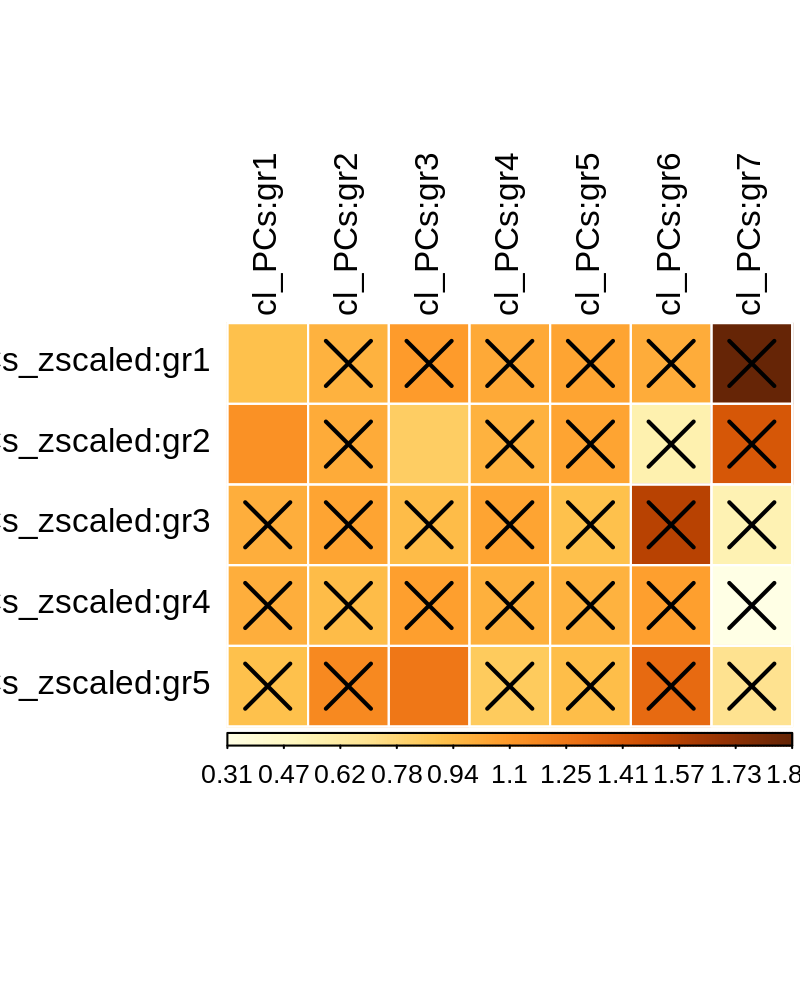

In [11]:
# plot enrichment clusters
library(corrplot)
library(RColorBrewer)

options(repr.plot.width = 4, repr.plot.height = 5, repr.plot.res = 200)

pdf(sprintf('%senrichmentCL_Liver_in_CLPCs_Fisher.pdf', outFold), width = 5, height = 6)
corrplot(OR_mat, is.corr = FALSE, p.mat = pval_mat,  method = 'color', addgrid.col = 'white',  
         cl.pos = 'b', tl.col = 'black', cl.cex = 0.8, sig.level = 0.01)
dev.off()

corrplot(OR_mat, is.corr = FALSE, p.mat = pval_mat,  method = 'color', addgrid.col = 'white',  
         cl.pos = 'b', tl.col = 'black', cl.cex = 0.8, sig.level = 0.01)

2 deplition and 2 enrichments. gr PC 1 in gr gene 2 and gr PC 3 in gr gene 5 (p < 0.0005 ). Could be reflected in a overrepresentaiton in the initial centre?

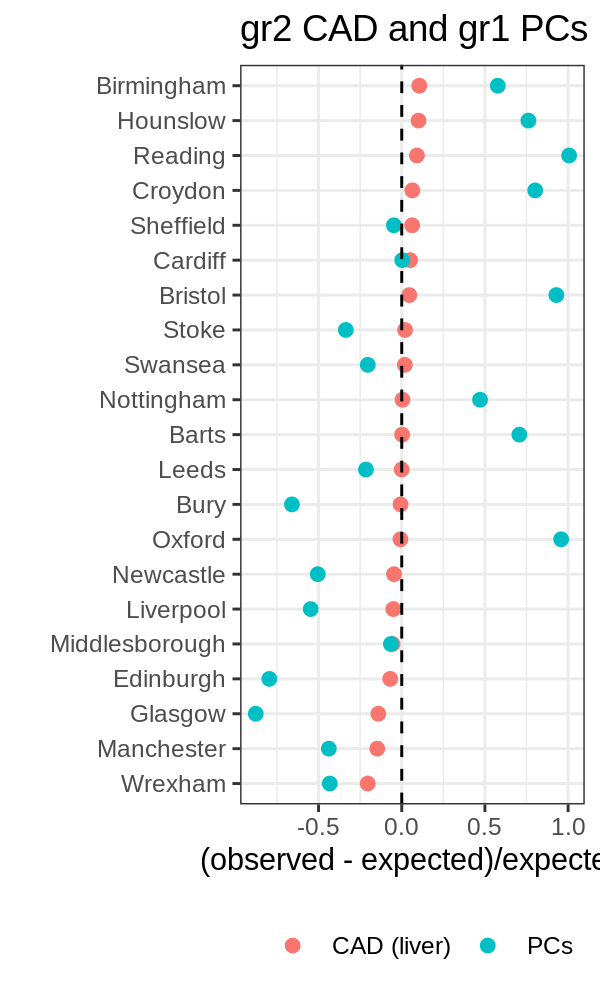

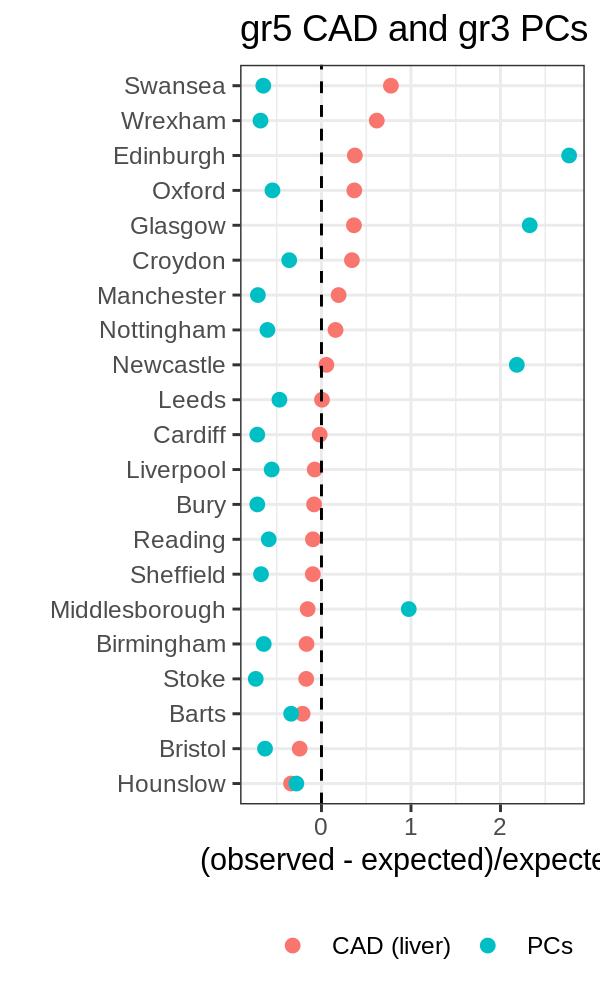

In [15]:
##### FROM HERE ########

# gr1 Liver vs gr7 PCs, enrich in specific UK regions?
options(repr.plot.width = 3, repr.plot.height = 5, repr.plot.res = 200)

metric_diff <- function(gr_CAD, gr_PC, cl_CAD, cl_PC){
    
    tab_ov <- table(sample_info$initial_assessment_centre, cl_CAD$gr == gr_CAD)
    row_s <- rowSums(tab_ov)
    col_s <- colSums(tab_ov)
    exp_ov <- (row_s %o% col_s)/sum(tab_ov)
    tmp <- as.data.frame((tab_ov - exp_ov)/exp_ov)
    tmp <- tmp %>% filter(Var2 == "TRUE") %>% 
        mutate(gr = gr_CAD, type = 'CAD (liver)') %>% 
        select(-Var2) %>% rename(Centre = Var1)
    df <- tmp  
    
    tab_ov <- table(sample_info$initial_assessment_centre, cl_PC$gr == gr_PC)
    row_s <- rowSums(tab_ov)
    col_s <- colSums(tab_ov)
    exp_ov <- (row_s %o% col_s)/sum(tab_ov)
    tmp <- as.data.frame((tab_ov - exp_ov)/exp_ov)
    tmp <- tmp %>% filter(Var2 == "TRUE") %>% 
        mutate(gr = gr_PC, type = 'PCs') %>% 
        select(-Var2) %>% rename(Centre = Var1)
    
    df <- rbind(df, tmp)
    df$Centre <- factor(df$Centre, levels = tmp$Centre[order(df$Freq[df$type == 'CAD (liver)'])])
                                                       
    return(df)

}

df <- metric_diff(gr_CAD = 2, gr_PC = 1, cl_CAD = cl_cPC[[id_liver]], cl_PC = cl_PC)

pl <- ggplot(df, aes(x = Centre, y = Freq, color = type))+
  geom_point(size = 2)+
  ylab('(observed - expected)/expected') + xlab('') + ggtitle('gr2 CAD and gr1 PCs')+
  geom_hline(yintercept = 0, linetype = 'dashed', color = 'black') +
  theme_bw() + theme(legend.position = 'bottom', legend.title = element_blank())+
  coord_flip()
pl
ggsave(pl, filename = sprintf('%schisq_enrichment_Centre_gr2CAD_gr1PCs.pdf', outFold),
       width = 3, height = 5, dpi=200)


df <- metric_diff(gr_CAD = 5, gr_PC = 3, cl_CAD = cl_cPC[[id_liver]], cl_PC = cl_PC)
pl <- ggplot(df, aes(x = Centre, y = Freq, color = type))+
  geom_point(size = 2)+
  ylab('(observed - expected)/expected') + xlab('') + ggtitle('gr5 CAD and gr3 PCs')+
  geom_hline(yintercept = 0, linetype = 'dashed', color = 'black') +
  theme_bw() + theme(legend.position = 'bottom', legend.title = element_blank())+
  coord_flip()
pl
ggsave(pl, filename = sprintf('%schisq_enrichment_Centre_gr5CAD_gr3PCs.pdf', outFold),
       width = 3, height = 5, dpi=200)

Conclusion: gr2 from Liver and gr1 from PCs slighlty overlap, probabily there is an enrichemnt in people from "Reading" surroundings. No enrichment in the other groups!

### Compare endophenotype Liver PCs and corrPCs zscaled

In [16]:
plot_comparison <- function(endo1, endo2, endo1_name, endo2_name, tissue, thr_pl = 5){
  
  pheno_id <- intersect(unique(endo1$pheno_id), unique(endo2$pheno_id))
  
  # get best result for each group
  endo1_best <- endo1 %>% 
    group_by(pheno_id) %>%  
    summarise(Field = Field[which.min(pvalue)], meaning = meaning[which.min(pvalue)],
              min_p = min(pvalue), best_z = z[which.min(pvalue)], 
              gr = comp[which.min(pvalue)], BH_corr = pval_corr[which.min(pvalue)] <=0.05) %>%
    mutate(log10p = -log10(min_p)) %>% ungroup(pheno_id)
  
  endo2_best <- endo2 %>% 
    group_by(pheno_id) %>%  
    summarise(Field = Field[which.min(pvalue)], meaning = meaning[which.min(pvalue)],
              min_p = min(pvalue), best_z = z[which.min(pvalue)], 
              gr = comp[which.min(pvalue)], BH_corr = pval_corr[which.min(pvalue)] <=0.05) %>%
    mutate(log10p = -log10(min_p)) %>% ungroup(pheno_id)
  
  combined <- endo1_best %>% full_join(endo2_best, 
                                       c("pheno_id" = "pheno_id")) %>% drop_na(min_p.x) %>% drop_na(min_p.y)
  combined <- combined %>% 
    mutate(label = ifelse(is.na(meaning.x), paste(Field.x),paste(Field.x, meaning.x, sep = '\n'))) 
  combined$sign <- 'FDR > 0.05'
  combined$sign[combined$BH_corr.y] <- sprintf('FDR < 0.05 (%s)', endo2_name)
  combined$sign[combined$BH_corr.x] <- sprintf('FDR < 0.05 (%s)', endo1_name)
  combined$sign[combined$BH_corr.y & combined$BH_corr.x] <- sprintf('FDR < 0.05 (%s & %s)', 
                                                                    endo1_name, endo2_name)
  combined$label_plot <- combined$label
  if(endo1_name == 'PCs'){
    combined$label_plot[!combined$sign %in% c(sprintf('FDR < 0.05 (%s)', endo2_name), 
                                              sprintf('FDR < 0.05 (%s & %s)', endo1_name, endo2_name)) & combined$log10p.x < thr_pl] <- ""
  }else{
    combined$label_plot[!combined$sign %in% c(sprintf('FDR < 0.05 (%s)', endo1_name),
                                              sprintf('FDR < 0.05 (%s)', endo2_name), 
                                              sprintf('FDR < 0.05 (%s & %s)', endo1_name, endo2_name))] <- ""  
  }
  
  combined$sign <- factor(combined$sign, 
                          levels = c( 'FDR > 0.05', sprintf('FDR < 0.05 (%s)', endo1_name),
                                     sprintf('FDR < 0.05 (%s)', endo2_name), 
                                     sprintf('FDR < 0.05 (%s & %s)', endo1_name, endo2_name)))
  
  pl <- ggplot(combined, aes(x = log10p.x, y = log10p.y, color = sign, label = label_plot))+
    geom_point(size = 1) + 
    geom_text_repel(size = 3,  max.overlaps = 20, force = 50)+
    geom_vline(xintercept = -log10(0.001), color = 'black', linetype = 'dashed') + 
    geom_hline(yintercept = -log10(0.001), color = 'black', linetype = 'dashed') + 
    #annotate("text", x=-Inf, y=Inf, hjust=-0.2, vjust=1.2, 
    #         label = paste0("R2 = ", round(cor(combined$log10p.x, combined$log10p.y), digits = 3)))+
    xlab(sprintf('clustering from %s', endo1_name)) + 
    ylab(sprintf('clustering from %s', endo2_name)) + 
    ggtitle(tissue)+
    theme_bw() + theme(legend.position = 'right') +
    scale_color_manual(values = c('grey80', 'red', 'blue', 'purple'))
 
  ggsave(pl, filename = sprintf('%s/%s_endophenotype_%s_%s.pdf', outFold, tissue, endo1_name, endo2_name),
         width = 8, height = 5.5, dpi=200)
  
    return(pl)

}


Rows: 4336 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (7): pheno_id, Field, meaning, CI_up, type_pheno, comp, pheno_type
dbl (8): beta, se_beta, z, pvalue, OR_or_Beta, CI_low, pval_corr, pval_corr_...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 3178 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (7): pheno_id, Field, meaning, CI_up, type_pheno, comp, pheno_type
dbl (8): beta, se_beta, z, pvalue, OR_or_Beta, CI_low, pval_corr, pval_corr_...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

`summarise()` has grouped output by 'pheno_id'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'pheno_id'

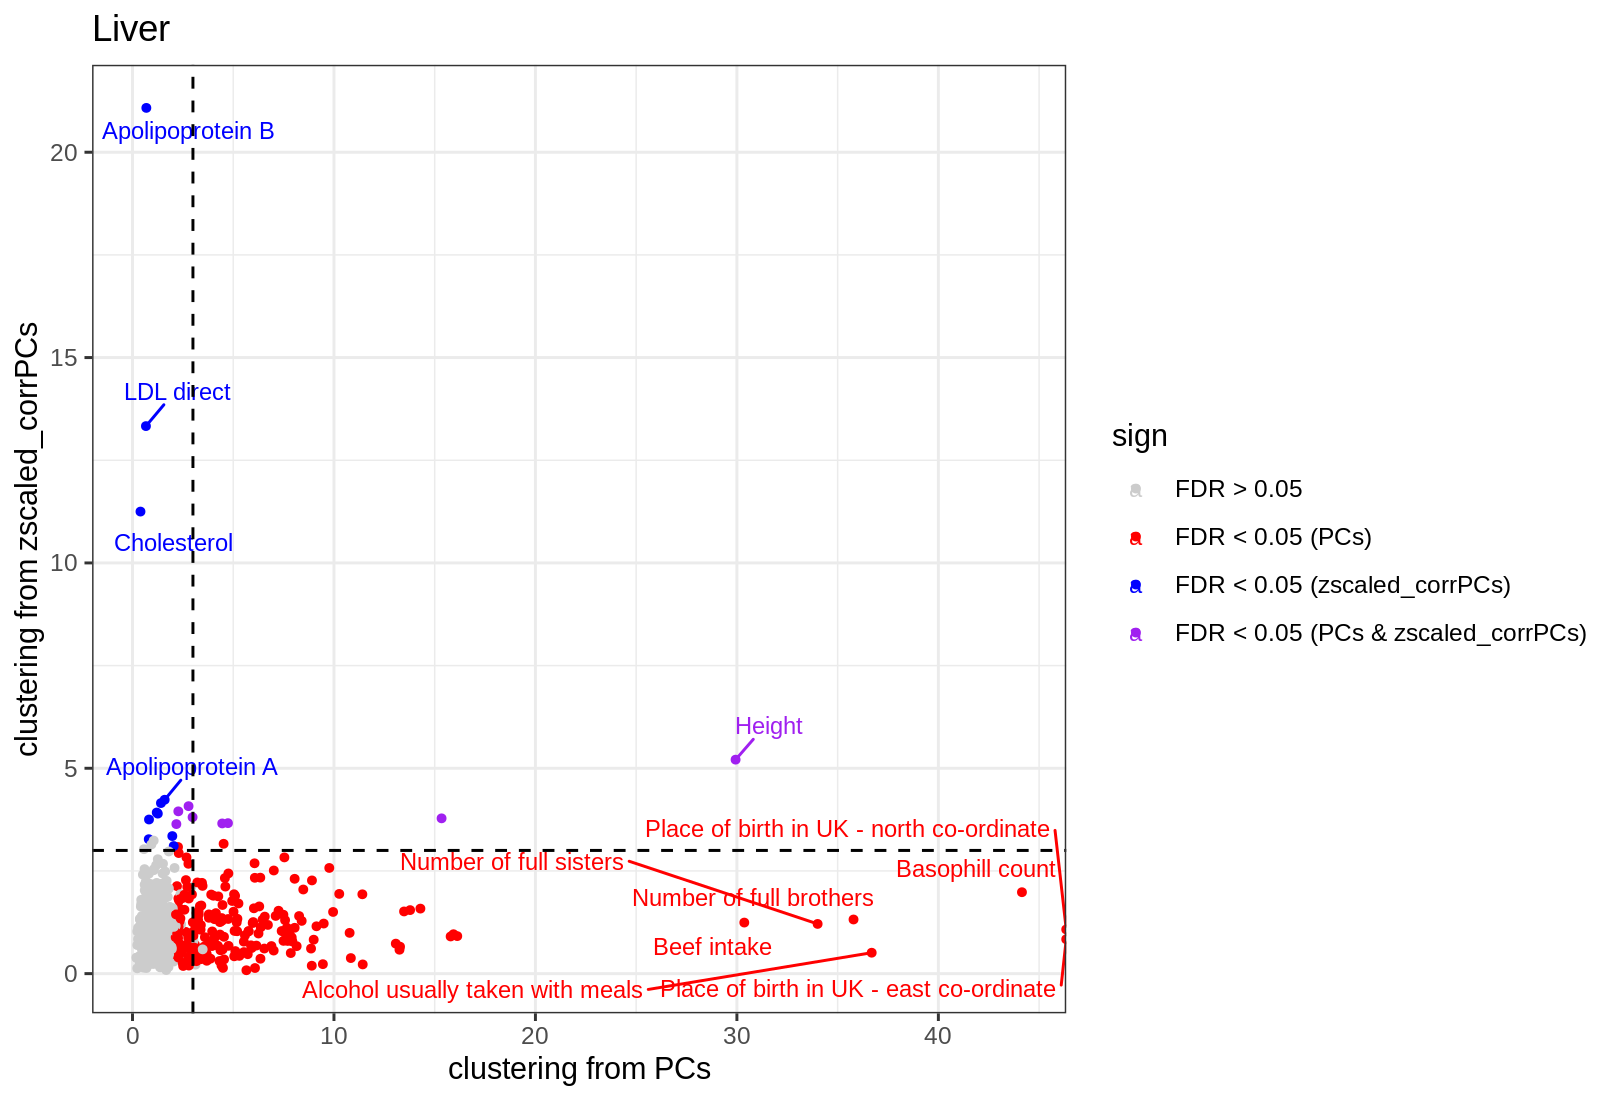

In [17]:
options(repr.plot.width = 8, repr.plot.height = 5.5, repr.plot.res = 200)

file <- sprintf('OUTPUT_GTEx/predict_CAD/%s/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/CAD_HARD_clustering//update_corrPCs/', tissues[id_liver])

zscaled_corrPCs <- vector(length = n_tissues, mode = 'list')
endop_res_PCs <- read_tsv('INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/PCs_original_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM_combined.txt')
zscaled_corrPCs[[id_liver]] <- read_tsv(sprintf('%stscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM_combined.txt', file))

plot_comparison(endo2 = zscaled_corrPCs[[id_liver]], endo1 = endop_res_PCs,  tissue = tissues[id_liver],
                  endo1_name = 'PCs', endo2_name = 'zscaled_corrPCs', thr_pl = 20)  

The plot is done considering for each endophenotype the best p-value result across all the groups.
The clustering structures lead to different endophenotypes significance (no correlation), the intersect with common phenotypes significant in both clusterings can be explained by regionality and eating habits. 
- Does the "common" result correspond to association on the overlapping clustering? (Fisher exact test)

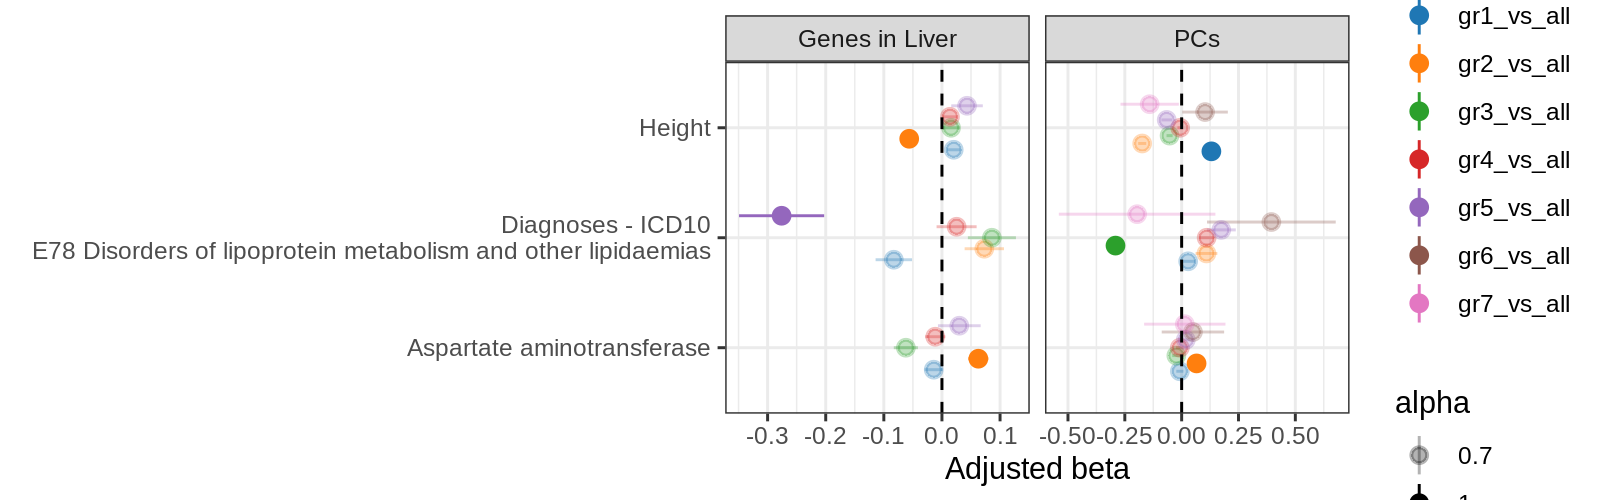

In [18]:
options(repr.plot.width = 8, repr.plot.height = 2.5, repr.plot.res = 200)

library(ggsci)

df_PCs <- endop_res_PCs %>% filter(pheno_id %in% c('41270_E78', '12144der', '30650'))
df_endo <- zscaled_corrPCs[[id_liver]] %>% filter(pheno_id %in% c('41270_E78', '12144der', '30650'))

df_PCs <- df_PCs %>% 
    mutate(label = ifelse(is.na(meaning), paste(Field),paste(Field, meaning, sep = '\n')), alpha = '0.7') 
df_PCs <- df_PCs %>% group_by(Field) %>% 
    mutate(alpha = case_when(pvalue == min(pvalue) ~ '1', TRUE ~ alpha)) 

df_endo <- df_endo %>% 
    mutate(label = ifelse(is.na(meaning), paste(Field),paste(Field, meaning, sep = '\n')),  alpha = '0.7') 
df_endo <- df_endo %>% group_by(Field) %>% 
    mutate(alpha = case_when(pvalue == min(pvalue) ~ '1', TRUE ~ alpha)) 


df_PCs$type <- 'PCs'
df_endo$type <- 'Genes in Liver'
df <- rbind(df_PCs, df_endo)

pl <- ggplot(df, aes(x = label, y= beta, color = comp, alpha = alpha)) +
    geom_pointrange(aes(ymin=beta-se_beta, ymax=beta+se_beta), 
                    position = position_dodge(width = 0.5)) + 
    facet_wrap(.~type, scales = 'free_x', nrow = 1) + 
    scale_color_d3() + 
    scale_alpha_manual(values = c(0.3, 1))+
    geom_hline(yintercept = 0, linetype = 'dashed')+
    theme_bw() + xlab("") + ylab("Adjusted beta") + 
    
    coord_flip()
pl
    
ggsave(pl, filename = sprintf('%s/common_sign_endophenotype_PCs_liver.pdf', outFold),
         width = 8, height = 2.5, dpi=200)



- Group 5 in liver is not enriched in group 2 in PCs and have opposite effects
- Group1 in Liver is enriched in group7 in PCs and they are both the most significant associations, BUT the effect is opposite meaning that the enrichment doesn't influence the endophenotype differences
- group1 in liver is depleated in group 3 in PCs, possible connection to differences but mild
Conclusion: mild impact on PCs on clustering structure (that cannot be removed) but does not impact the observed differences in endophenotype associations. 


In [ ]:
library(ComplexHeatmap)
library(circlize)
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 200)

tab_ov <- t(table(sample_info$initial_assessment_centre, cl_PC$gr))
frac_ov <- matrix(tab_ov/rowSums(tab_ov), 
                  nrow = length(unique(cl_PC$gr)),
                  ncol = length(unique(sample_info$initial_assessment_centre)))
colnames(frac_ov) <- sort(unique(sample_info$initial_assessment_centre))
rownames(frac_ov) <- sort(unique(cl_PC$gr))

col_fun = colorRamp2(c(0, max(frac_ov)), c("grey90", "darkblue"))
Heatmap(frac_ov, cluster_columns = T, show_column_dend = F, cluster_rows = F, col = col_fun, name = 'Fraction per group')
ht <- Heatmap(frac_ov, cluster_rows = F, show_column_dend = F, cluster_columns = T, col = col_fun, name = 'Fraction per group')

pdf('INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/Heatmap_centre_clPCs.pdf', width = 5, height = 4)
draw(ht)
dev.off()


## Compare corrPCs_original and corrPCs_zscaled:
- differences in term of NMI, 
- n. of clusters, 
- cluster quality (coverga + 1 - conductance)
- n. of sign associations (endophenotypes) per number of groups
- number of significant genes and enrichment in TWAS CAD genes


In [ ]:
# load clustering structure results and info
# compare clustering structure
df_NMI$corrPCs_vs_zcorrPCs <- NA
df_cl <-  data.frame(tissue = rep(tissues, 2), 
                     type = c(rep('corrPCs_original', n_tissues), rep('corrPCs_zscaled', n_tissues)), 
                     n_gr = NA, mod = NA)
cl_cPC_original <- list()

for(i in 1:length(tissues)){
  
  tissue <- tissues[i]
  print(tissue)
  
  file <- sprintf('OUTPUT_GTEx/predict_CAD/%s/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/CAD_HARD_clustering//update_corrPCs/', tissue)
   
  out_cPC_o <- get(load(sprintf('%s/tscore_corrPCs_original_clusterCases_PGmethod_HKmetric.RData', file)))
  out_cPC <- get(load(sprintf('%s/tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric.RData', file)))
  cl_cPC_original[[i]] <- out_cPC_o$cl_best
  df_cl <- df_cl %>% 
        mutate(n_gr = replace(n_gr, tissue == tissues[i] & type == 'corrPCs_zscaled',
                              length(unique(out_cPC$cl_best$gr))), 
               mod = replace(mod, tissue == tissues[i] & type == 'corrPCs_zscaled', 
                             out_cPC$info_tune$mod), 
               n_gr = replace(n_gr, tissue == tissues[i] & type == 'corrPCs_original',
                              length(unique(out_cPC_o$cl_best$gr))), 
               mod = replace(mod, tissue == tissues[i] & type == 'corrPCs_original', 
                             out_cPC_o$info_tune$mod))
       
  df_NMI$corrPCs_vs_zcorrPCs[i] <- compare(cl_cPC[[i]]$gr, cl_cPC_original[[i]]$gr, method = 'NMI')
    
}



In [ ]:
# NMI between corrPCs_zscaled and corrPCs_ori
options(repr.plot.width = 3.7, repr.plot.height = 3, repr.plot.res = 200)

n_tissues <- length(tissues)
df_nmi_pl <- data.frame(tissue = df_NMI$tissue, 1, 
                       NMI = c(df_NMI$corrPCs_vs_zcorrPCs), 
                       type = rep('original vs zscaled (corrPCs)', n_tissues))

df_nmi_pl$tissue <- factor(df_nmi_pl$tissue, levels = rev(tissues))

pl_NMI <- ggplot(df_nmi_pl, aes(x = tissue, y = NMI))+
  geom_bar(stat = 'identity', width = 0.5)+
  facet_wrap(.~type, ncol = 3, scales = 'free_x')+
  xlab('') + ylab('NMI') + 
  theme_bw() + 
  theme(axis.text.y = element_text(colour = rev(color_tissues$color)), 
        axis.text.x = element_text(angle = 45, hjust = 1))+
  coord_flip()
pl_NMI
ggsave(pl_NMI, filename = sprintf('%scompare_originalcorrPCs_zscaledcorrPCs_NMI.pdf', outFold),
       width = 3.7, height = 3, dpi=200)



In [ ]:
# plot n_gr and mod

options(repr.plot.width = 7, repr.plot.height = 3, repr.plot.res = 200)

df_cl_pl <- df_cl
df_cl_pl$tissue <- factor(df_cl$tissue, levels = rev(tissues))

pl_cl_n <- ggplot(df_cl_pl, aes(x = tissue, y = n_gr, fill = type))+
  geom_bar(stat = 'identity', width = 0.5, position = position_dodge())+
  xlab('') + ylab('n. groups') + 
  theme_bw() + 
  theme(legend.position = 'bottom', axis.text.y = element_text(colour = rev(color_tissues$color)), 
        axis.text.x = element_text(angle = 0, hjust = 0), )+
  coord_flip()

pl_cl_mod <- ggplot(df_cl_pl, aes(x = tissue, y = mod, fill = type))+
  geom_bar(stat = 'identity', width = 0.5, position = position_dodge())+
  xlab('') + ylab('Modularity\nLouvain method') + 
  theme_bw() + 
  theme(legend.position = 'bottom', axis.text.y = element_text(colour = rev(color_tissues$color)), 
        axis.text.x = element_text(angle = 0, hjust = 0), )+
  coord_flip()

pl_tot <-  ggarrange(plotlist = list(pl_cl_n, pl_cl_mod), ncol = 2, nrow = 1, align='h', common.legend = T)
pl_tot
ggsave(pl_tot, filename = sprintf('%scompare_originalcorrPCs_zscaledcorrPCs_mod_ngr.pdf', outFold),
       width = 7, height = 3, dpi=200)






With the "original" setting, the number of groups is always > 10 and higher than the number of groups with "zscaled". On the other hand, the modularity is always bigger for zscaled. Hence, the structure is more "defined" when pointing toward relevant features. 
On the other hand, the NMI is variable but not null, hence some structure is retained, expecially for HAA tissue.

In [ ]:
# compare endophenotype differences
endop_zcorrPCs <- endop_ocorrPCs <- list()
df_nsign <-  data.frame(tissue = rep(tissues, 2), 
                     type = c(rep('corrPCs_original', n_tissues), rep('corrPCs_zscaled', n_tissues)), 
                     n_sign = NA, n_sign_u = NA)

for(i in 1:length(tissues)){

  tissue <- tissues[i]
  print(tissue)
  
  file <- sprintf('OUTPUT_GTEx/predict_CAD/%s/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/CAD_HARD_clustering//update_corrPCs/', tissue)
  endop_zcorrPCs[[i]] <- read_tsv(sprintf('%stscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM_combined.txt', file), show_col_types = FALSE)
  endop_ocorrPCs[[i]] <- read_tsv(sprintf('%stscore_corrPCs_original_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM_combined.txt', file), show_col_types = FALSE)
  tmp_z <- endop_zcorrPCs[[i]] %>% filter(pval_corr <= 0.05)
  tmp_o <- endop_ocorrPCs[[i]] %>% filter(pval_corr <= 0.05)
  df_nsign <- df_nsign %>% 
               mutate(n_sign = replace(n_sign, tissue == tissues[i] & type == 'corrPCs_zscaled', nrow(tmp_z)),
                      n_sign = replace(n_sign, tissue == tissues[i] & type == 'corrPCs_original', nrow(tmp_o)), 
                      n_sign_u = replace(n_sign, tissue == tissues[i] & type == 'corrPCs_zscaled', length(unique(tmp_z$pheno_id))), 
                      n_sign_u = replace(n_sign, tissue == tissues[i] & type == 'corrPCs_original', length(unique(tmp_o$pheno_id))))
}



In [ ]:
# numbers are wrong! check n. unique pheno id
# plot correlation best results
df_nsign
sum(df_nsign$n_sign[df_nsign$type == 'corrPCs_zscaled'])
sum(df_nsign$n_sign[df_nsign$type == 'corrPCs_original'])

for(i in 1:length(tissues)){
    print(i)
    print(min(endop_zcorrPCs[[i]]$pvalue, na.rm = T))
    print(min(endop_ocorrPCs[[i]]$pvalue, na.rm = T))
}
